In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import modules.visualize_event 
import modules.plot_utils
import modules.plane_mapping
import modules.load_data

In [2]:
# load training data and training labels
data, labels =modules.load_data.load_train_df(
    path            = "../data/",
    training_data   = "real/train/data/raw_data_train_4.npz",
    training_labels = "real/train/targets/targets_train_4.csv",
    pmt_mapping     = "PMTPos_CD_LPMT.csv",
    pmt_id_conv     = "PMT_ID_conversion.csv"
)

100%|██████████| 5000/5000 [00:01<00:00, 3258.19it/s]


In [3]:
data

,ev_id,pmt_id,charge,hit_time,x,y,z,R,theta,phi
0,0.0,0.0,1.016910,278.543843,-930.2976,-111.8724,19365.0,19387.655713,0.0,0.0
1,0.0,1.0,1.289895,270.036129,-492.5657,-797.0872,19365.0,19387.655711,0.0,0.0
2,0.0,2.0,1.457318,263.317109,316.0782,-882.0791,19365.0,19387.655711,0.0,0.0
3,0.0,8.0,0.931422,267.299700,-1001.8845,-956.3302,19365.0,19414.467930,0.0,0.0
4,0.0,14.0,1.325459,329.878129,1317.6029,426.9224,19365.0,19414.467933,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
28344454,4999.0,17596.0,1.015088,363.252414,910.4179,-1043.7812,-19365.0,19414.467928,180.0,0.0
28344455,4999.0,17600.0,0.946382,375.834414,815.0244,1119.8550,-19365.0,19414.467930,180.0,0.0
28344456,4999.0,17603.0,0.849958,378.658700,-972.9179,985.7260,-19365.0,19414.464968,180.0,0.0
28344457,4999.0,17604.0,1.005972,295.039843,-1273.1379,545.3989,-19365.0,19414.467932,180.0,0.0


In [4]:
# create the mapping for the projection
plane_mapping = modules.plane_mapping.plane_mapping(
    path        = "../data/",
    pmt_mapping = "PMTPos_CD_LPMT.csv"
)
plane_mapping

,row,col,id
0,105,0,0
1,106,0,1
2,107,0,2
3,108,0,3
4,109,0,4
...,...,...,...
17607,121,121,17607
17608,122,121,17608
17609,123,121,17609
17610,124,121,17610


In [28]:
EV_ID = np.random.randint(0, 5000)
plane_df = modules.plane_mapping.plane_projection(
    df      = data,
    mapping = plane_mapping,
    ev_id   = EV_ID
)
plane_df

,row,col,id,ev_id,charge,hit_time,x,y,z,R,theta,phi
0,105,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,106,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,107,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,108,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109,0,4,344.0,0.765232,414.598414,789.6295,504.4345,19365.0,19387.655710,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17607,121,121,17607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17608,122,121,17608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17609,123,121,17609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17610,124,121,17610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
mat_mapping = modules.plane_mapping.convert_to_matrix(
    df      = plane_mapping,
    values  = "id",
    fill_na = np.nan
)

plane_mat_c  = modules.plane_mapping.convert_to_matrix(
    df     = plane_df,
    values = "charge",
    fill_na = np.nan
)
plane_mat_ht = modules.plane_mapping.convert_to_matrix(
    df     = plane_df,
    values = "hit_time",
    fill_na = np.nan
)

plane_mat = np.stack([plane_mat_c, plane_mat_ht], axis=2)

plane_mat.shape

(219, 122, 2)

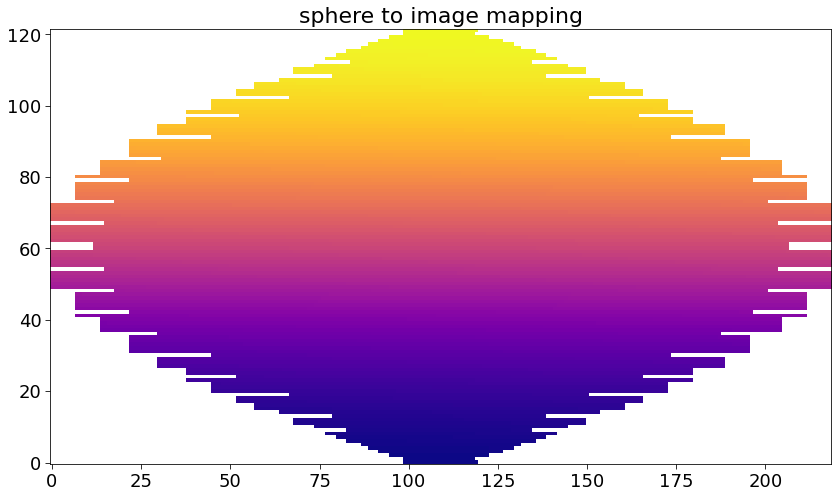

In [30]:
fig = plt.figure(figsize=(14,14))
ax = modules.plot_utils.plot_2d_image(
    mat_mapping,
    fig,
    "sphere to image mapping",
    111,
    18,
    "plasma"
)
fig.savefig("sphere_to_image.png", facecolor="white", dpi=300)
plt.show()

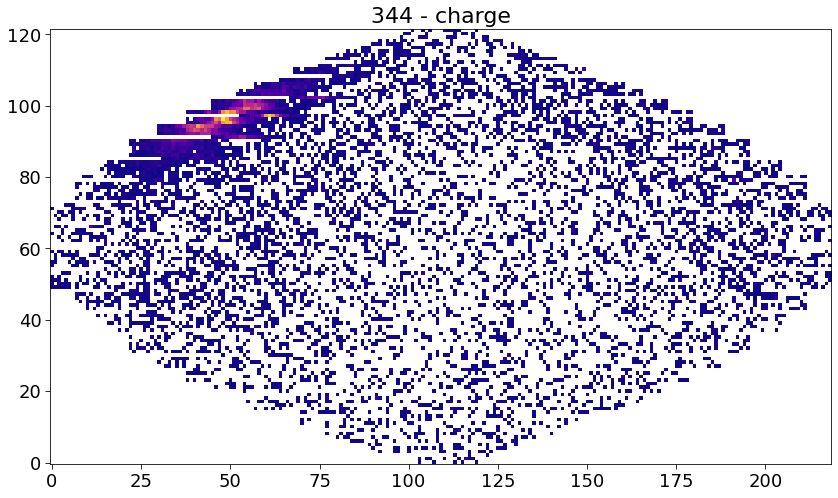

In [31]:
fig = plt.figure(figsize=(14,14))
ax = modules.plot_utils.plot_2d_image(
    plane_mat_c,
    fig,
    f"{EV_ID} - charge",
    111,
    18,
    "plasma"
)
fig.savefig("charge_image.png", facecolor="white", dpi=300)
plt.show()

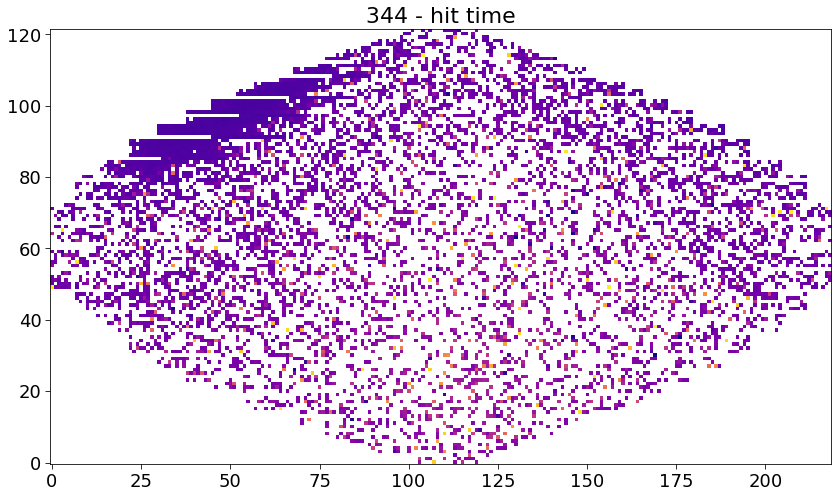

In [32]:
fig = plt.figure(figsize=(14,14))
ax = modules.plot_utils.plot_2d_image(
    plane_mat_ht,
    fig,
    f"{EV_ID} - hit time",
    111,
    18,
    "plasma"
)
fig.savefig("charge_image.png", facecolor="white", dpi=300)
plt.show()

In [9]:
events = data["ev_id"].astype(int).unique()

In [22]:
plane_mapping = modules.plane_mapping.plane_mapping(
    path        = "../data/",
    pmt_mapping = "PMTPos_CD_LPMT.csv"
)

plane_mat = np.zeros(shape=(1, 219, 122, 2))

for ev in events:
    plane_df = modules.plane_mapping.plane_projection(
        df      = data,
        mapping = plane_mapping,
        ev_id   = ev
    )
    plane_mat_c  = modules.plane_mapping.convert_to_matrix(
        df      = plane_df,
        values  = "charge",
        fill_na = 0
    )
    plane_mat_ht = modules.plane_mapping.convert_to_matrix(
        df      = plane_df,
        values  = "hit_time",
        fill_na = 0
    )

    mat_two_ch = np.stack([plane_mat_c, plane_mat_ht], axis=2)
    
    mat_two_ch = np.expand_dims(mat_two_ch, axis=0)
    
    print(mat_two_ch.shape)
    # plane_mat = np.concatenate([plane_mat, mat_two_ch], axis=0)

(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 216, 121, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 217, 122, 2)
(1, 218, 122, 2)
(1, 218, 119, 2)
(1, 218, 122, 2)
(1, 218, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 218, 122, 2)
(1, 214, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 218, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 121, 2)
(1, 219, 122, 2)
(1, 214, 122, 2)
(1, 217, 122, 2)
(1, 219, 121, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 218, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 218, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 121, 2)
(1, 218, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 219, 122, 2)
(1, 216, 121, 2)
(1, 219, 122, 

KeyboardInterrupt: 